In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis

import lsfit
reload(lsfit)

import include_modules_root as rt
import Kalman_tom

In [3]:
# Figure save path prefix
savefig.fig_prefix = "plots/singletrack_"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = False         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

In [4]:
filename = f"{DATA_DIR}/muon_100_GeV/20230503/170343/stat0.root"
# filename = f"{DATA_DIR}/muon_0.5_GeV/20230503/170209/stat0.root"

tfile = root.TFile.Open(filename)
tree_name = tfile.GetListOfKeys()[0].GetName()
Tree = tfile.Get(tree_name)

nevents = int(Tree.GetEntries())
branch_list = [Tree.GetListOfBranches()[i].GetName() for i in range(len(Tree.GetListOfBranches()))]
print("Number of events",nevents)

Number of events 10000


In [5]:
res = get_km_alltracks(filename, nevents=10000)
res.keys()

  0%|          | 0/10000 [00:00<?, ?it/s]


UnboundLocalError: local variable 'vertex_recon_cov' referenced before assignment

In [ ]:
chi2=util.appcut(res["tracks_chi2"],res["mask_recon_success_track"])
chi2=util.Utils.flatten1d(chi2)

In [ ]:
hist(chi2);
yscale("log")
print(mean(chi2))


---
# Compare two files

In [15]:
file_list = [f"{DATA_DIR}/muon_0.5_GeV/20230503/170209/stat0.root", 
            f"{DATA_DIR}/muon_0.5_GeV/20230503/170209/stat_seedmod.root", ]
# file_list = [f"{DATA_DIR}/muon_100_GeV/20230503/170343/stat0.root", 
#             f"{DATA_DIR}/muon_100_GeV/20230503/170343/stat_seedmod.root", ]

# file_list = [f"{DATA_DIR}/electron_100_GeV/20230503/222430/stat0.root", 
#             f"{DATA_DIR}/electron_100_GeV/20230503/222430/stat_seedmod.root", ]




name_list = ["Mod","Original"]
energy_list = name_list

In [16]:
reload(lsfit)

<module 'lsfit' from '/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py'>

In [31]:
sum(recon[:,1]>8600)/10000

0.0034

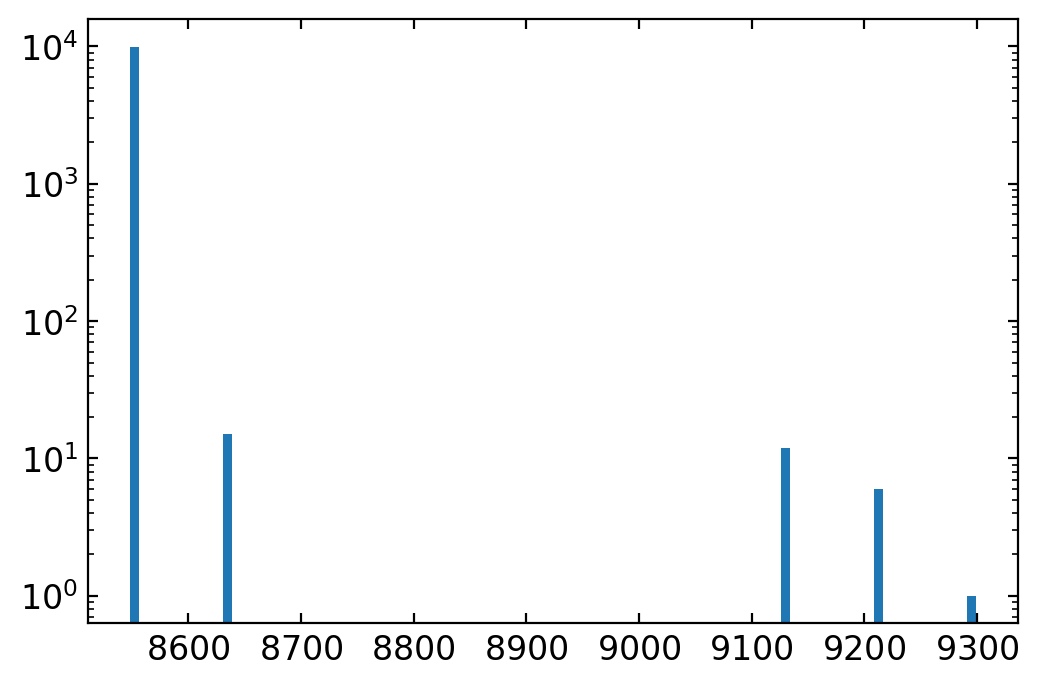

In [29]:
mask_recon_success=data["mask_recon_success"]
recon     =np.array(data["recon"])[mask_recon_success]
recon_unc =np.array(data["recon_error"])[mask_recon_success]
truth     =np.array(data["truth"])[mask_recon_success]

hist(recon[:,1]);
yscale("log")

------------Reading Mod files--------------


 20%|██        | 2007/10000 [00:01<00:05, 1557.65it/s]/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:250: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 10000/10000 [00:07<00:00, 1426.87it/s]
/project/6035200/tomren/jupyter/tracker_6layers/lsfit.py:259: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results_fit[key]=np.array(results_fit[key])
100%|██████████| 10000/10000 [00:07<00:00, 1359.15it/s]


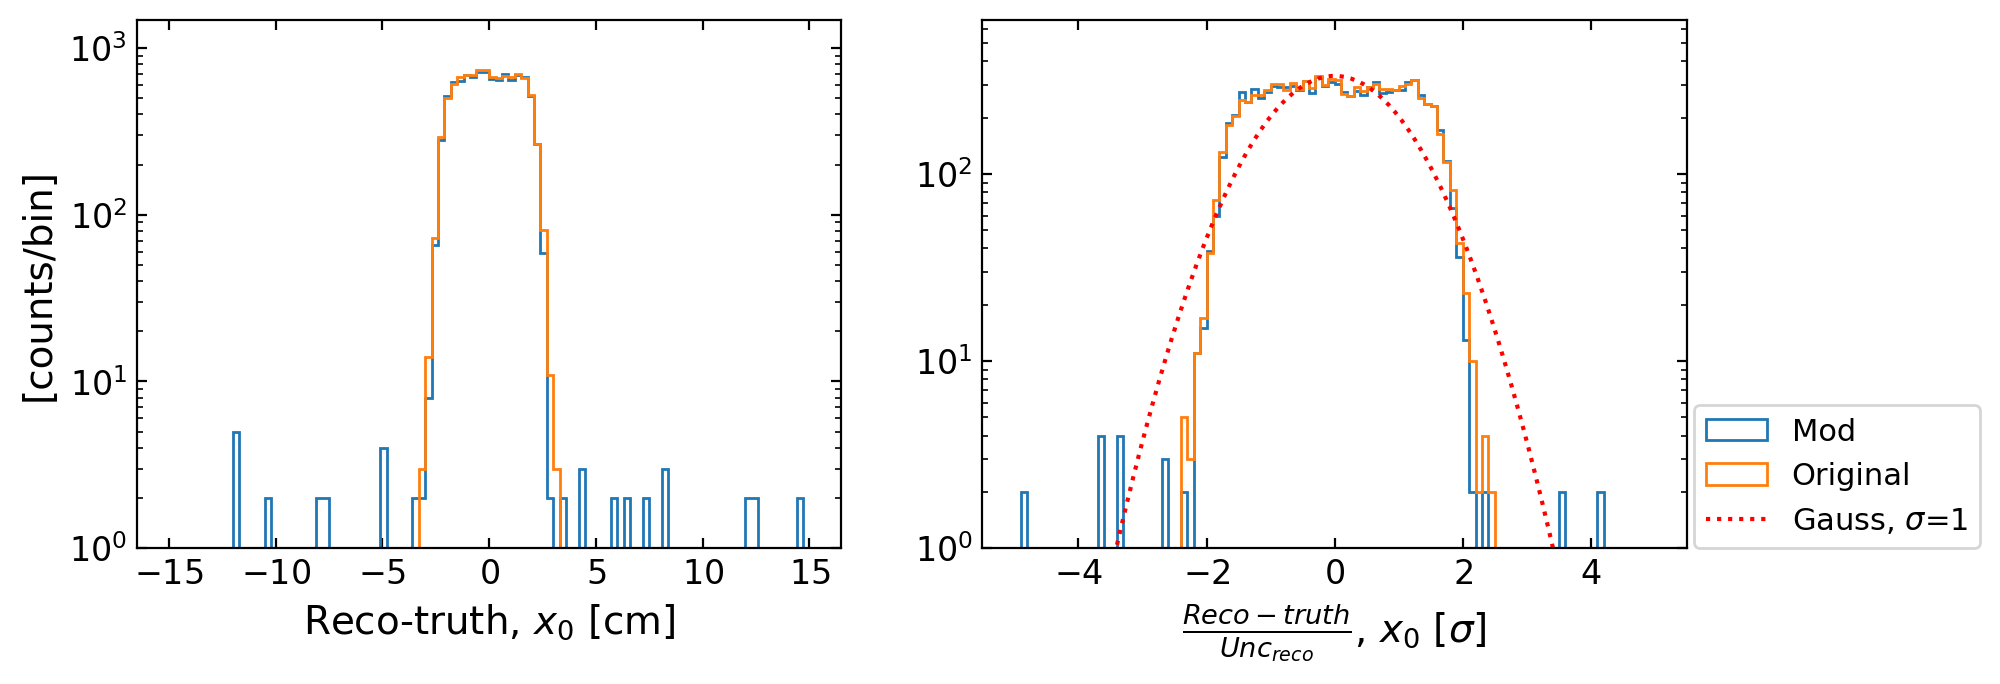

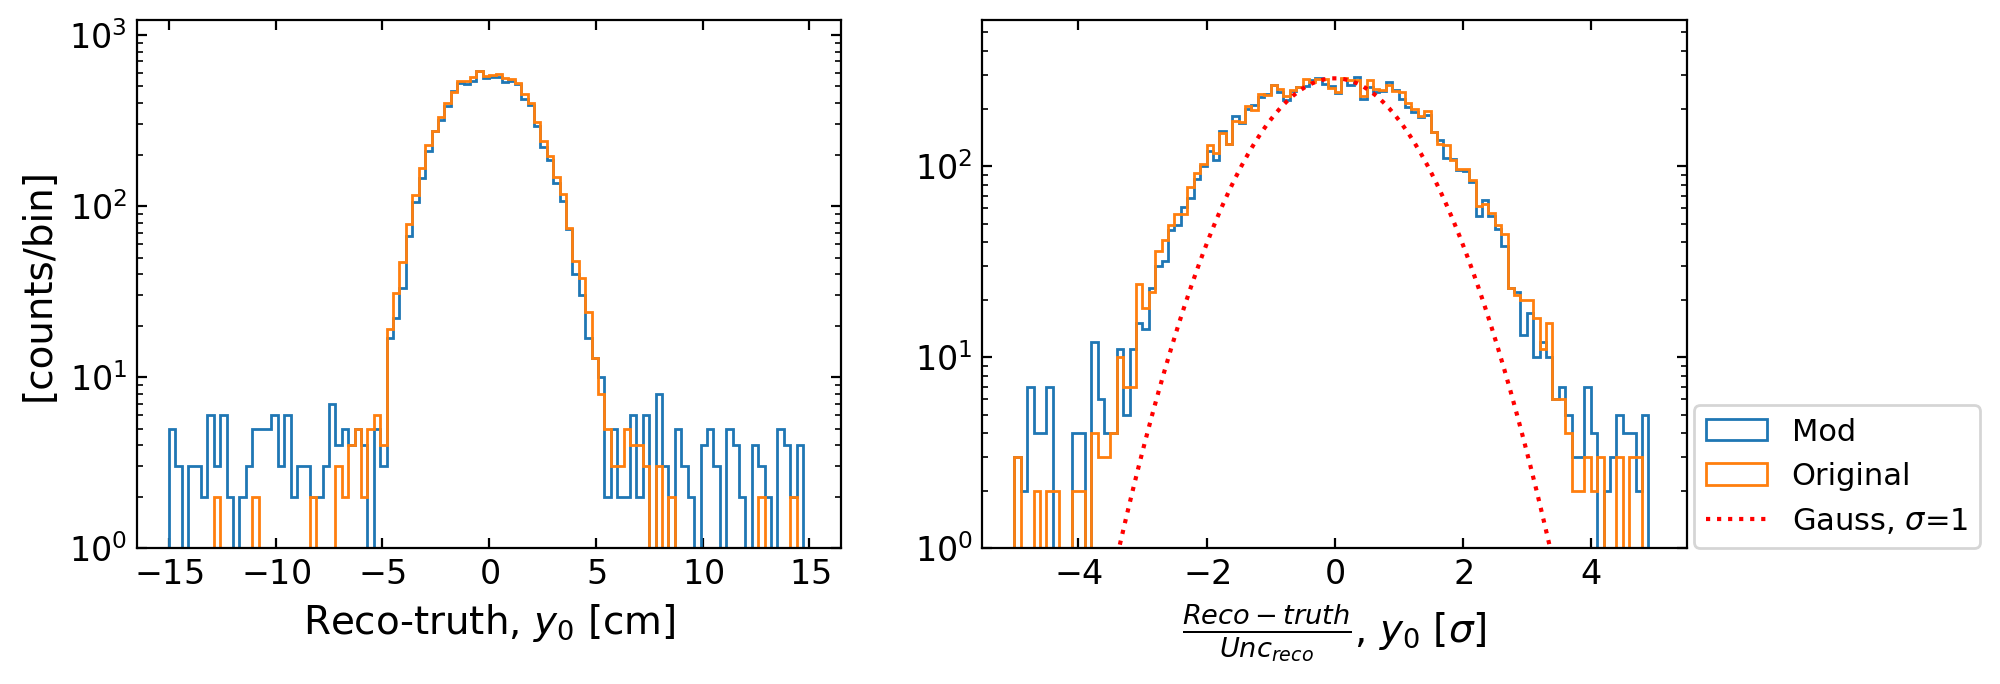

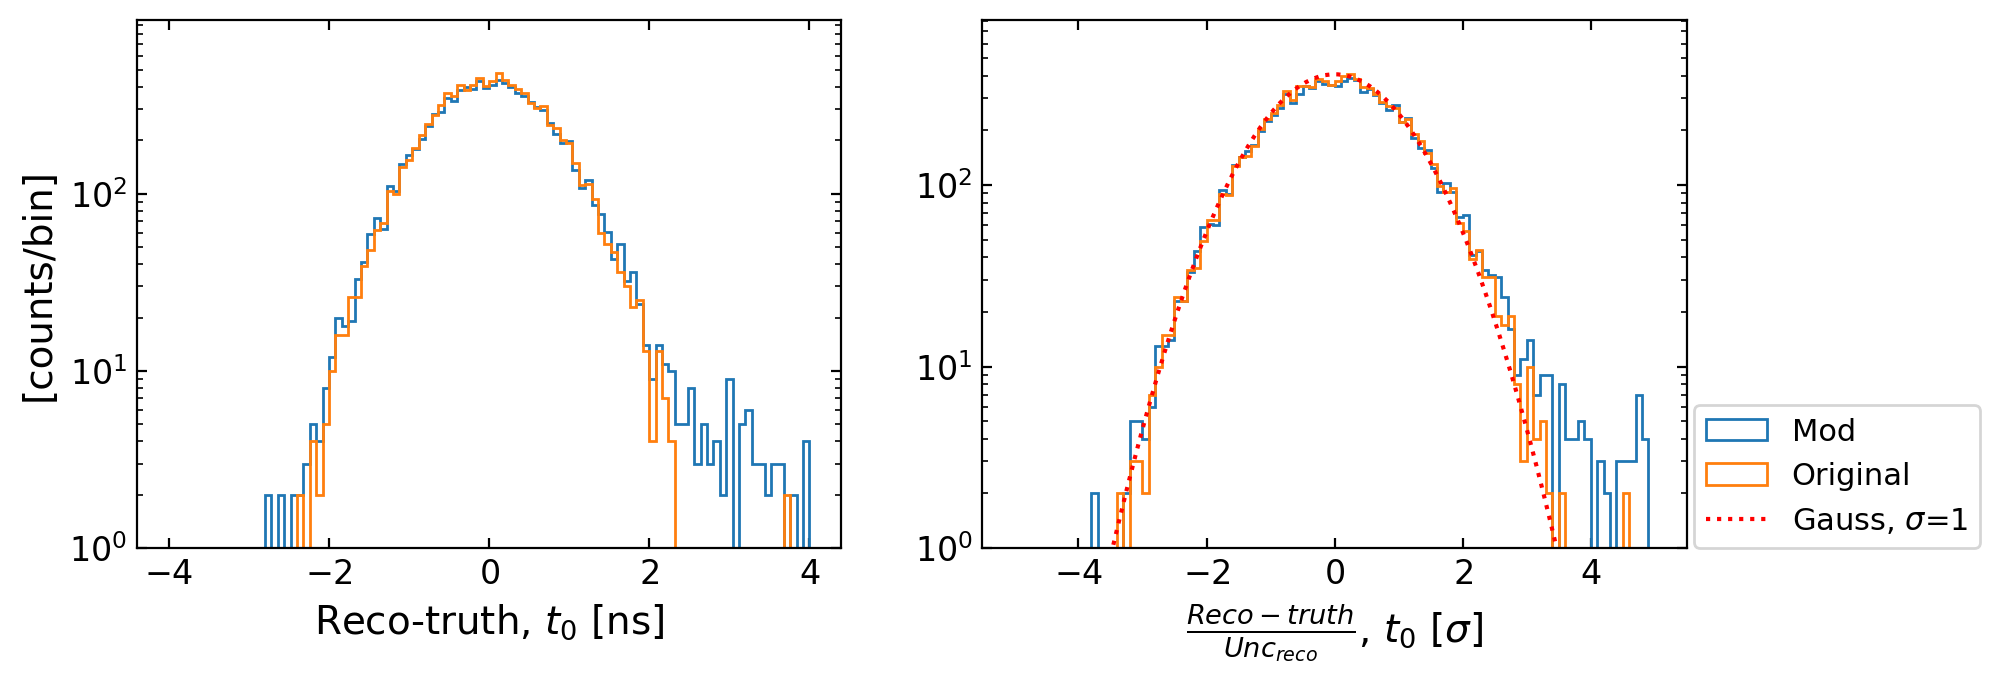

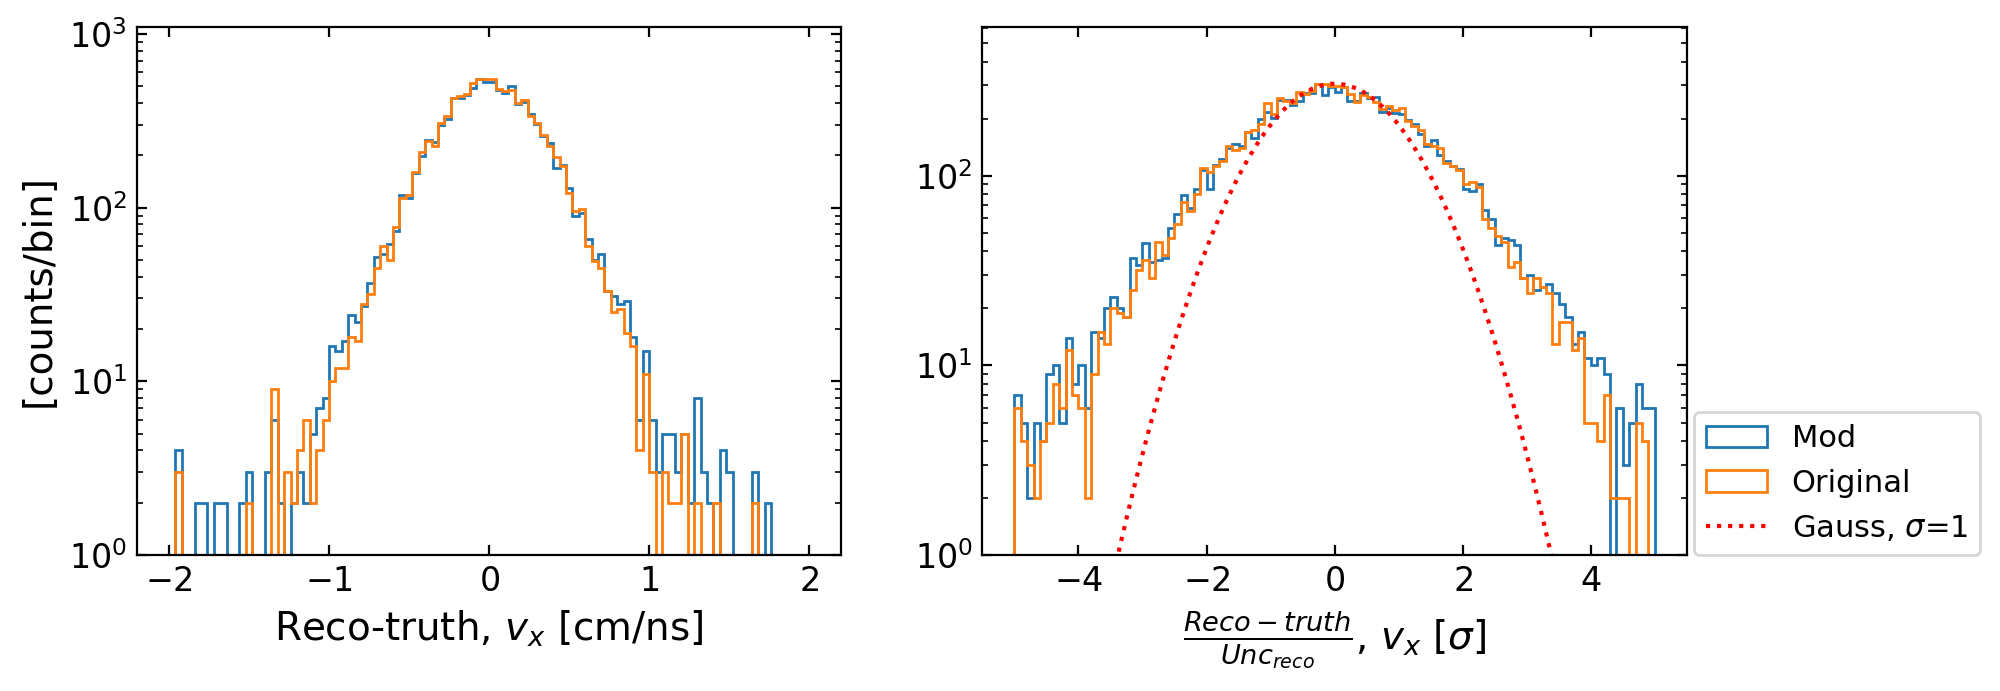

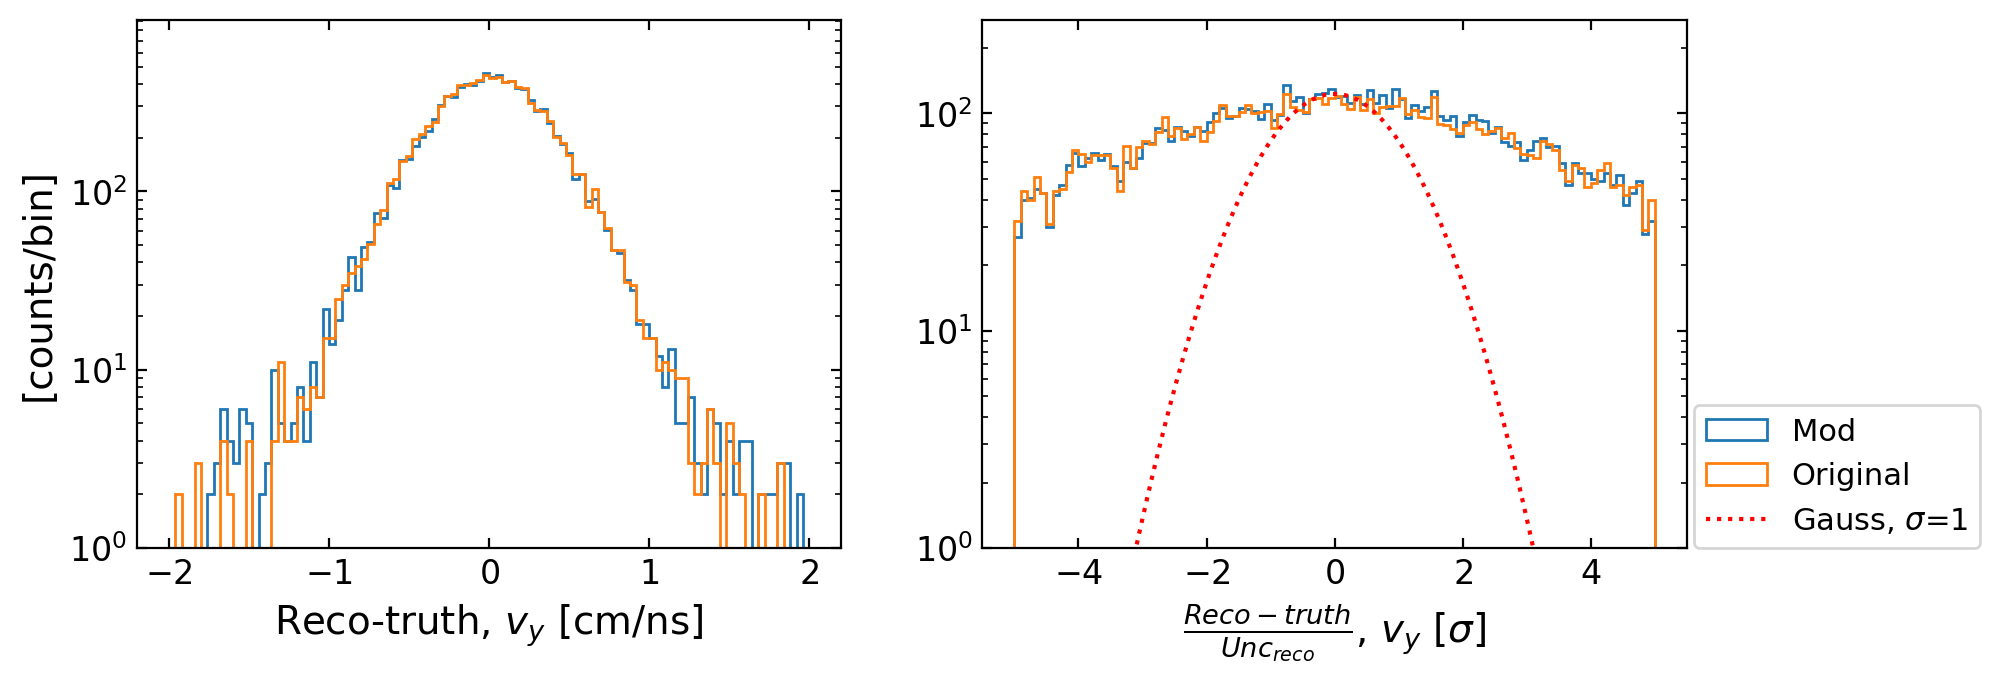

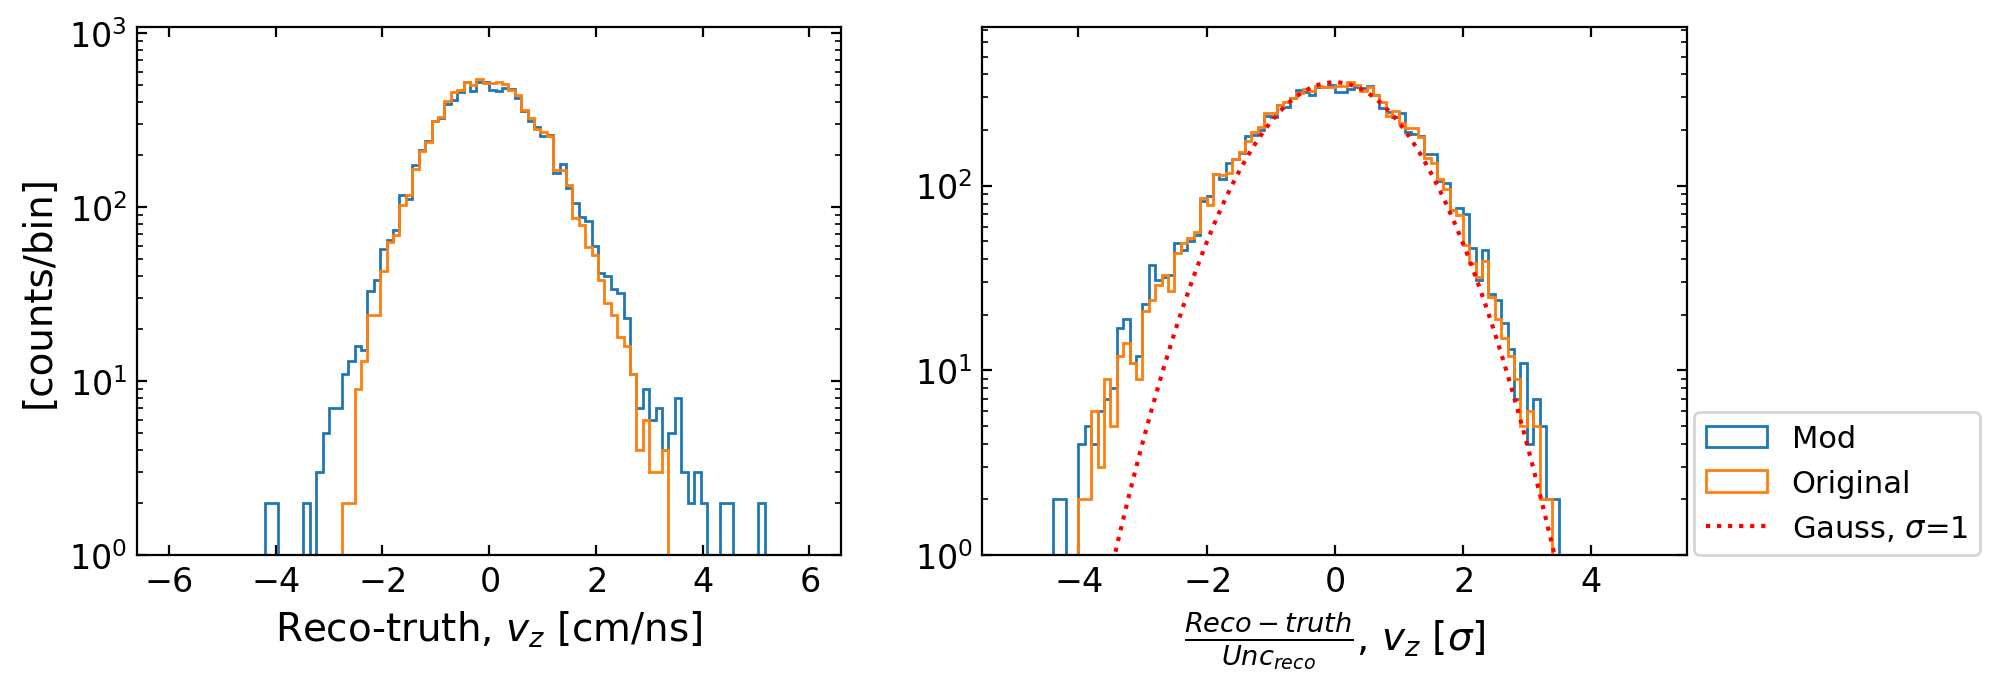

In [23]:
data_ind = 0
data_name = name_list[data_ind]
PDG_TRUTH = pdgid_list[data_ind]


for data_ind in range(1):
    data_name = name_list[data_ind]
    PDG_TRUTH = pdgid_list[data_ind]
    
    print(f"------------Reading {data_name} files--------------")

    Data=[]
    for i in range(len(energy_list)):
        Data.append(lsfit.get_km(file_list[i], nevents=10000))
        

    effs=[]
    resolutions=[]
    for i in range(len(energy_list)):
        data=Data[i]
        if i==0:
            figs = plot_res_pull(data,              label=f"{energy_list[i]}", make_legend=False,  plot_gauss1=False)
        elif i==len(energy_list)-1:
            figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]}", make_legend=True,  plot_gauss1=True)
        else:
            figs = plot_res_pull(data, figs = figs, label=f"{energy_list[i]}", make_legend=False,  plot_gauss1=False)


        # Calculate efficiency
        eff_i = calc_eff(data, PDG_TRUTH=PDG_TRUTH)
        effs.append(eff_i)

#         # Calculate resolution
#         res_i = calc_resolution(data)
#         resolutions.append(res_i)


    # # Save spectrum
    # for i in range(6):
    #     figure(figs[i])
    #     savefig(f"Residual_Pull_{data_name}_{PAR_LABELS_RAW[INDS_PAR[i]]}")
    #     show()
    #     close() # Use close to not show figures again


#     # Plot efficiency
#     effs = np.array(effs)    
#     errorbar(energy_list, effs[:,1,0], yerr=(effs[:,1,1], effs[:,1,2]),fmt="o-",label="$\epsilon_{abs, TIGHT}$")
#     errorbar(energy_list, effs[:,2,0], yerr=(effs[:,2,1], effs[:,2,2]),fmt="o-",label="$\epsilon_{abs, LOOSER}$")
#     errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt=".-",color="grey", linewidth=2,label="$k_{reconstructible}$")
#     legend()
#     xscale("log")
#     ylim(0,1)
#     xlabel("Momentum [GeV/c]")
#     ylabel("Efficiency")
#     savefig(f"Efficiency_{data_name}")
#     show()

#     errorbar(energy_list, effs[:,3,0], yerr=(effs[:,3,1], effs[:,3,2]),fmt="o-",color="grey",label="$k_{reconstructible}$")
#     errorbar(energy_list, effs[:,4,0], yerr=(effs[:,4,1], effs[:,4,2]),fmt="o--",color="C2",label="$\epsilon_{recog}$")
#     errorbar(energy_list, effs[:,5,0], yerr=(effs[:,5,1], effs[:,5,2]),fmt=".:",color="C3", linewidth=2,label="$\epsilon_{param}$")
#     legend()
#     xscale("log")
#     ylim(0,1)
#     xlabel("Momentum [GeV/c]")
#     ylabel("Efficiency")
#     savefig(f"Efficiency_breakdown_{data_name}")
#     show()


#     # Plot Resolution
#     resolutions = np.array(resolutions)
#     for i  in range(6):
#         errorbar(energy_list[1:], resolutions[1:,0,i], yerr= resolutions[1:,1,i], label="$\sigma$",fmt="o--", capsize=3)
#         plot(energy_list[1:], resolutions[1:,2,i]/2.355, label="FWHM/2.355")
#         xlabel("Momentum [GeV/c]")
#         ylabel("Resolution "+PAR_LABELS[i])
#         ylim(bottom=0)
#         xscale("log")
#         legend()
#         savefig(f"Resolution_{data_name}_{PAR_LABELS_RAW[i]}")
#         show()
        
        
#     # Save the data points
#     results={"energy_list":energy_list,
#             "efficiencies":effs,
#             "resolutions":resolutions}
#     joblib.dump(results, f"data/plotdata_{data_name}_efficiency_resolution.joblib")

In [24]:
effs

[(array([9.99600000e-01, 2.40181587e-04, 1.70978454e-04]),
  array([0.6993    , 0.00459849, 0.00457192]),
  array([0.9345    , 0.00250312, 0.00244518]),
  array([9.97300000e-01, 5.54321790e-04, 4.87648262e-04]),
  array([0.96650958, 0.00183312, 0.00177074]),
  array([0.93879033, 0.0024721 , 0.00241139])),
 (array([9.99500000e-01, 2.62889959e-04, 1.94222590e-04]),
  array([0.7212    , 0.00449844, 0.00446894]),
  array([0.9676    , 0.00180215, 0.00173979]),
  array([9.97300000e-01, 5.54321790e-04, 4.87648262e-04]),
  array([0.95106788, 0.00219054, 0.00213023]),
  array([0.97564576, 0.00161674, 0.00154985]))]